## Imports

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors,metrics

import os,sys
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import learning_curve
#os.listdir('vertebral_column_data')

## Load Data

In [3]:
data = arff.loadarff('vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

df.head()
df.shape

(310, 7)

In [4]:
def encodeLabel(x):
    #print(x)
    if x==b'Abnormal':
        return int(1)
    return int(0)

In [5]:
df['class'] = df[['class']].apply(lambda x: encodeLabel(x['class']),axis =1)

In [6]:
#df.iloc[0]['class']
df.head(5)
#df.loc[df['class']==1,:].shape

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


## (b) i.

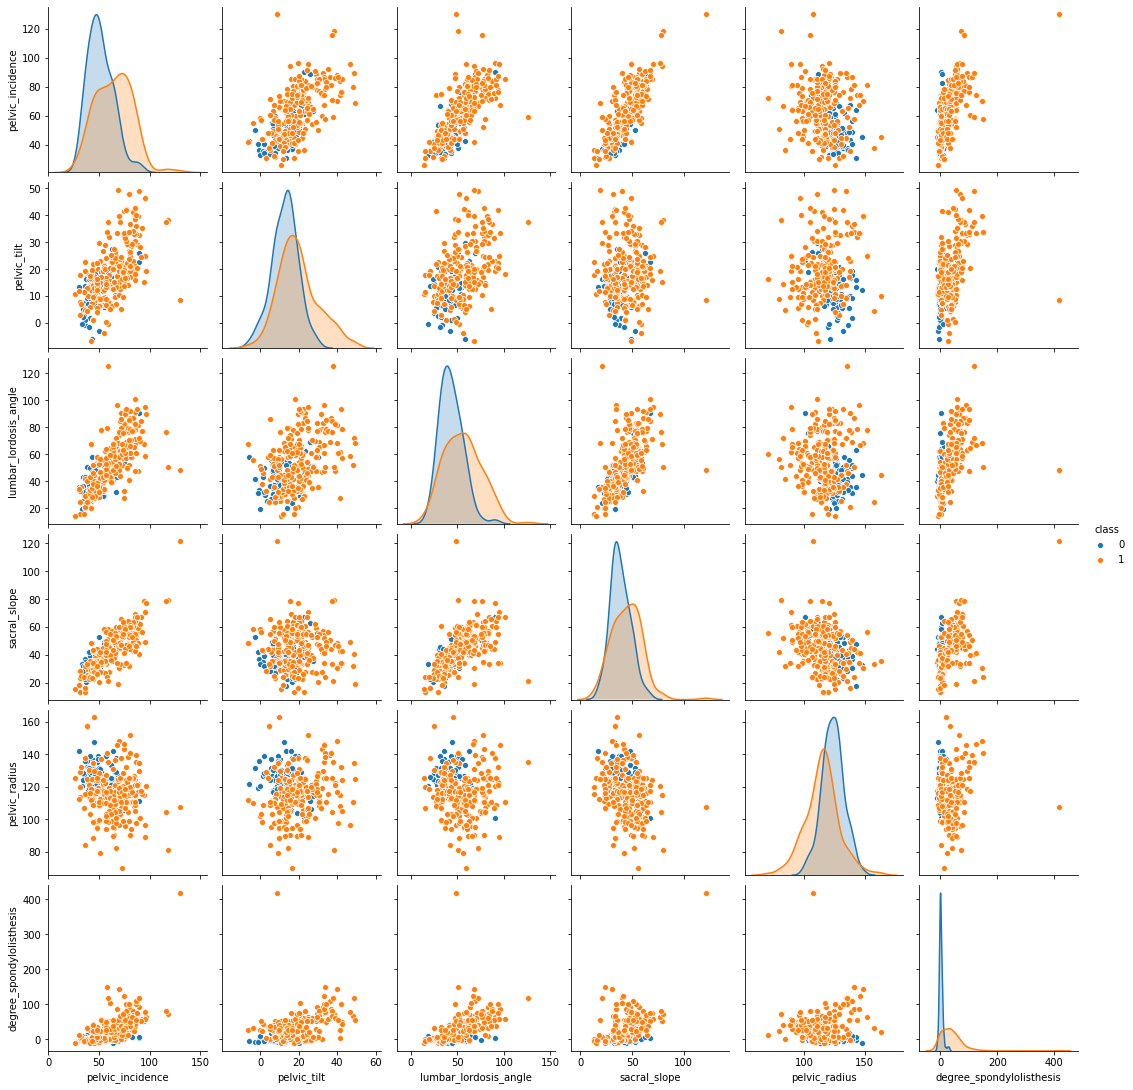

In [7]:
sns.pairplot(df,hue='class')

## (b) ii.

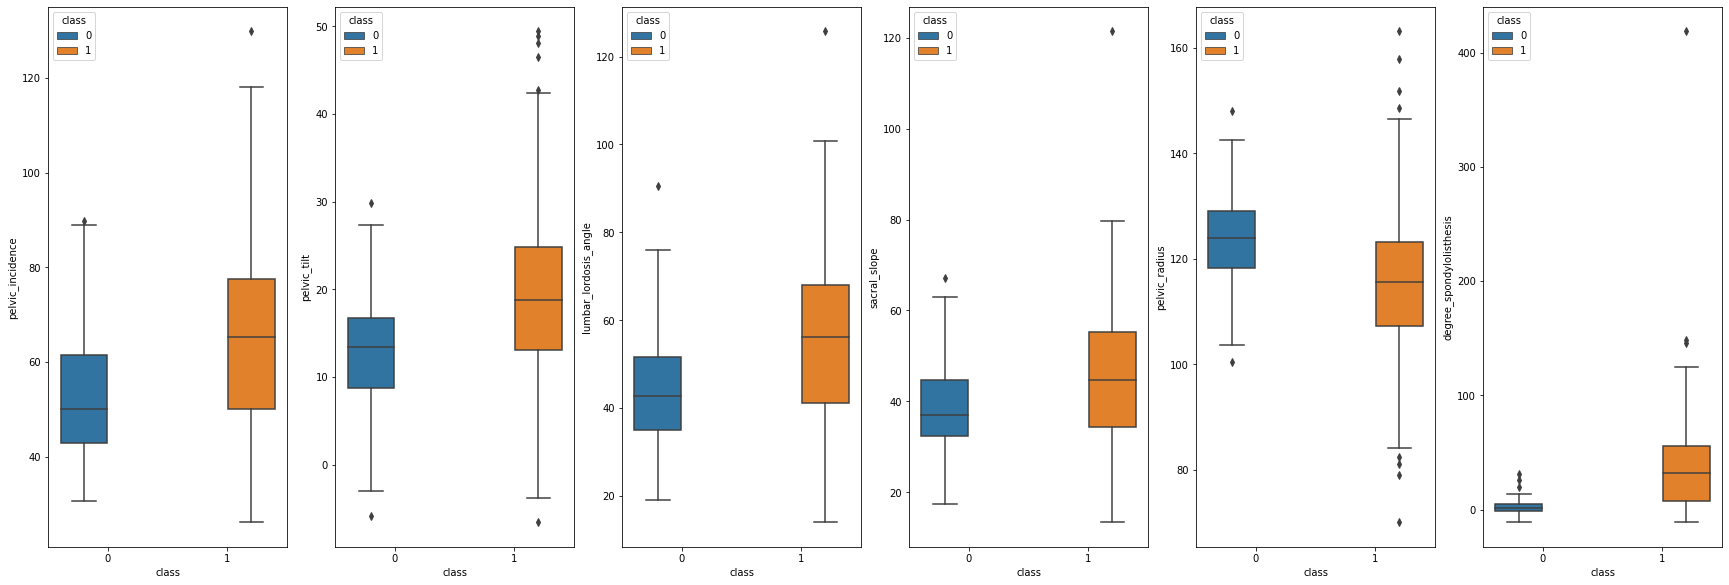

In [8]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=1,ncols=6)#,sharex=True,sharey=True)


sns.boxplot(x='class',y='pelvic_incidence',data=df,hue='class',ax=ax1)
sns.boxplot(x='class' ,y='pelvic_tilt' , data = df,hue='class',ax=ax2)
sns.boxplot(x="class" ,y='lumbar_lordosis_angle' , data = df,hue='class',ax=ax3)
sns.boxplot(x="class" ,y='sacral_slope' , data = df,hue='class',ax=ax4)
sns.boxplot(x="class" ,y='pelvic_radius' , data = df,hue='class',ax=ax5)
sns.boxplot(x="class" ,y='degree_spondylolisthesis' , data = df,hue='class',ax=ax6)
plt.subplots_adjust(right=4,top=2)

# (b) iii. Splitting into Train and Test Set

In [9]:
normal_df = df.loc[df['class']==0,:]#[:70] #class 0
abnormal_df = df.loc[df['class']==1,:]#[:140] # class 1  

train_normal_df,test_normal_df = train_test_split(normal_df,test_size=0.3,shuffle=False)#,random_state=17)   #train test = 70 ,30
train_abnormal_df,test_abnormal_df = train_test_split(abnormal_df,test_size=0.33,shuffle=False)#,random_state=17)# train test = 140, 70


#print(train_normal_df.shape)
#print(test_normal_df.shape)
#print(train_abnormal_df.shape)
#print(test_abnormal_df.shape)

In [10]:
X_train = train_normal_df.append(train_abnormal_df) # train set 210
X_test = test_normal_df.append(test_abnormal_df)

y_train = X_train.loc[:,X_train.columns[-1]]
X_train = X_train.loc[:,X_train.columns[:-1]]

y_test = X_test.loc[:,X_test.columns[-1]]
X_test = X_test.loc[:,X_test.columns[:-1]]


#print (X_train.shape,X_test.shape,y_train.shape,y_test.shape)

## (c) i & ii. KNN and Learning Curve

In [11]:
error_rate = []
for i in range(208,0,-3):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric = "euclidean")
    knn.fit(X_train,y_train)
    
    train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    error_rate.append({'k':i,'test_error':1-metrics.accuracy_score(y_test,y_pred),'train_error':1-train_error})

In [12]:
error_rate = pd.DataFrame(error_rate)
(error_rate)
# this shows the minimum training error as 0 with k = 1

,k,test_error,train_error
0,208,0.30,0.333333
1,205,0.30,0.333333
2,202,0.30,0.333333
3,199,0.30,0.333333
4,196,0.30,0.333333
...,...,...,...
65,13,0.12,0.142857
66,10,0.10,0.133333
67,7,0.12,0.142857
68,4,0.06,0.142857


In [13]:
opt_k = error_rate.loc[min(error_rate['test_error']) == error_rate['test_error'],:]
print(opt_k)
opt_k = int(opt_k.iloc[-1,:]['k'])
# The best k i.e K* is 4 with a test_error of 0.06

    k  test_error  train_error
68  4        0.06     0.142857


In [14]:
#print(opt_k)
#print(min(error_rate['test_error']))

Text(0, 0.5, 'error')

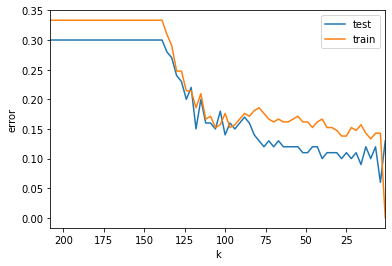

In [15]:
fig, ax = plt.subplots()

ax.plot(error_rate['k'],error_rate['test_error'],label='test')
ax.plot(error_rate['k'],error_rate['train_error'],label='train')
ax.set_xlim(max(error_rate['k']), min(error_rate['k'])) 
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel('error')

In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors=int(opt_k),metric = "euclidean")
knn.fit(X_train,y_train)
    
y_pred = knn.predict(X_test)


#print(metrics.classification_report(y_test,y_pred))

cm = metrics.confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cm.ravel()
#print('Confusion Matrix : ')
#print(cm)
#print('True Negative = ',tn,'False Positive = ', fp,'False Negative = ', fn,'True Positive = ', tp)
#print('True Positive Rate: ',tp/(tp+fn))
#print('True Negative Rate: ',tn/(tn+fp))

### Confusion Matrix, TPR, TNR, Precision & F1-Score for k* = 4

In [17]:
#print(opt_k)
print(metrics.classification_report(y_test,y_pred))
print('Confusion Matrix : ')
print(cm)
print('True Negative = ',tn,'False Positive = ', fp,'False Negative = ', fn,'True Positive = ', tp)
print('True Positive Rate: ',tp/(tp+fn))
print('True Negative Rate: ',tn/(tn+fp))
print('Precision:',tp/(tp+fp))
print('F1-Score:',tp/(tp+0.5*(fp+fn)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix : 
[[25  5]
 [ 1 69]]
True Negative =  25 False Positive =  5 False Negative =  1 True Positive =  69
True Positive Rate:  0.9857142857142858
True Negative Rate:  0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333334


## (c) iii. Learning Curve

In [18]:
test_optk = []
for i in range(10,220,10):
    onethird = round(i/3)
    class0_train = train_normal_df.iloc[:onethird,:]
    class1_train = train_abnormal_df.iloc[:(2*onethird),:]

    train_X = class0_train.append(class1_train)


    train_y = train_X.iloc[:,-1]
    train_X = train_X.iloc[:,:-1]

    #le = LabelEncoder()
    #train_y =le.fit_transform(train_y)
    
    #y_test = le.fit_transform(y_test)
    #print(train_X)
    #print(train_y)

    error_rate_k = []
    for k in range(1,210,5):
        #print (k,i)
        if k>i:
            break
        knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric = "euclidean")
        knn.fit(train_X,train_y)

        train_score=knn.score(X_train,y_train)
        test_score=knn.score(X_test,y_test)
        #y_pred = knn.predict(X_test)
        #1-metrics.accuracy_score(y_test,y_pred)
        error_rate_k.append({'k':k,'test_error':1-test_score,'train_error':1-train_score})

    error_rate_k = pd.DataFrame(error_rate_k)
#error_rate_k
    opt_k_record = error_rate_k.loc[min(error_rate_k['test_error']) == error_rate_k['test_error'],:]
    opt_k_record = opt_k_record.iloc[0,:]
    test_optk.append({'N':i,'OPT_K':int(opt_k_record['k']),'test_error':opt_k_record['test_error'],'train_error':opt_k_record['train_error']})
#test_optk




In [19]:
(pd.DataFrame(test_optk))
#print(opt_k_record)
#error_rate_k.plot('k')

,N,OPT_K,test_error,train_error
0,10,1,0.24,0.285714
1,20,6,0.19,0.238095
2,30,1,0.22,0.214286
3,40,11,0.25,0.242857
4,50,26,0.30,0.323810
5,60,21,0.29,0.290476
6,70,26,0.29,0.290476
7,80,31,0.29,0.300000
8,90,41,0.29,0.323810
9,100,46,0.28,0.300000


### Learning Curve

<AxesSubplot:xlabel='N'>

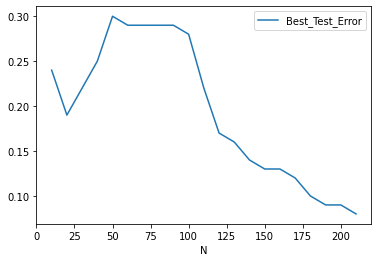

In [20]:
pd.DataFrame(test_optk).plot('N',['test_error'],label=['Best_Test_Error'])

## d(i). A. Manhattan Distance

In [21]:
manhattan_error_rate = []
for i in range(196,0,-5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric = "minkowski",p=1)
    knn.fit(X_train,y_train)
    
    train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    manhattan_error_rate.append({'k':i,'test_error':1-metrics.accuracy_score(y_test,y_pred)})

In [22]:
manhattan_df = pd.DataFrame(manhattan_error_rate)

In [23]:
opt_manhattan = manhattan_df.loc[min(manhattan_df['test_error']) == manhattan_df['test_error'],:]
(opt_manhattan)
# Multiple values of k yield minimum test error of 0.11 
# Best K can be chosen from {26,11,6,1}

,k,test_error
34,26,0.11
37,11,0.11
38,6,0.11
39,1,0.11


In [24]:
opt_manhattan_k = int(opt_manhattan.iloc[0]['k'])
print(opt_manhattan_k)
#optimum k for manhattan distance = 26 with error 0.11  {other possible values of k = 26,11,6,1}

26


## d(i). B. Log(P) base10  using k = 26

In [25]:
p = []
for i in np.arange(0.1,1.1,0.1):
    p.append(10 ** i)

In [26]:
#print(p)
#print(np.log10(p))

In [27]:
log_error_rate = []
for p_val in p:
    knn = neighbors.KNeighborsClassifier(n_neighbors=opt_manhattan_k,metric = "minkowski",p=p_val)
    knn.fit(X_train,y_train)
    
    #train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    log_error_rate.append({'k':opt_manhattan_k,'p':p_val,'log_p':np.log10(p_val),'test_error':1-metrics.accuracy_score(y_test,y_pred)})

In [28]:
log_error_rate_df = pd.DataFrame(log_error_rate)
#print(log_error_rate_df)

In [29]:
opt_logp = log_error_rate_df.loc[log_error_rate_df['test_error']== min(log_error_rate_df['test_error']),:]#.iloc[0]
(opt_logp)
# Multiple values of log(p) with base 10 yield min error of 0.1
# 0.1,0.2,0.4,0.6

,k,p,log_p,test_error
0,26,1.258925,0.1,0.1
1,26,1.584893,0.2,0.1
3,26,2.511886,0.4,0.1
5,26,3.981072,0.6,0.1


## (d)(i). C. Chebyshev Distance

In [30]:
import math
chebyshev_error_rate = []
for i in range(1,197,5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric ="minkowski",p=math.inf)
    knn.fit(X_train,y_train)
    
    train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    chebyshev_error_rate.append({'k':i,'test_error':1-metrics.accuracy_score(y_test,y_pred)})

In [31]:
chebyshev_df = pd.DataFrame(chebyshev_error_rate)
#print(chebyshev_df)

In [32]:
opt_chebyshev = chebyshev_df.loc[chebyshev_df['test_error']==min(chebyshev_df['test_error']),:]
(opt_chebyshev)

,k,test_error
3,16,0.08


## (d) ii. Mahalanobis Distance

In [33]:
mhl_error_rate = []
for i in range(1,197,5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric ="mahalanobis",metric_params={'V': X_train.cov()})
    knn.fit(X_train,y_train)
    
    train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    mhl_error_rate.append({'k':i,'test_error':1-metrics.accuracy_score(y_test,y_pred)})

/Users/ptk/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
/Users/ptk/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
/Users/ptk/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
/Users/ptk/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  

In [34]:
mhl_df = pd.DataFrame(mhl_error_rate)
print(mhl_df)

      k  test_error
0     1        0.14
1     6        0.16
2    11        0.18
3    16        0.16
4    21        0.19
5    26        0.17
6    31        0.19
7    36        0.20
8    41        0.21
9    46        0.19
10   51        0.22
11   56        0.21
12   61        0.24
13   66        0.23
14   71        0.24
15   76        0.24
16   81        0.22
17   86        0.22
18   91        0.23
19   96        0.23
20  101        0.23
21  106        0.23
22  111        0.24
23  116        0.25
24  121        0.28
25  126        0.29
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30


In [35]:
opt_mhl = mhl_df.loc[mhl_df['test_error']==min(mhl_df['test_error']),:]
(opt_mhl)
# Best K for Mahalanobis Distance = 1

,k,test_error
0,1,0.14


## Summarized Results for (d)

| Distance | k*/log_P | Best Test Error |
| --- | --- | --- |
| Manhattan | 26 | 0.11 |
| Minkowski | log_P = 0.2 | 0.10|
| Chebyshev | 16 | 0.08|
| Mahalanobis | 1 | 0.14 |

* same test error found for k = 1,6,11,26 in case of **Manhattan Distance**
* log_p values  0.1, 0.2, 0.4, 0.6 for k = 26 yield the same test_error in case of **Minkowski Distance**
* **Chebyshev Distance** gives the least error amongst all the above distances

## (e) Weighted Decision

In [36]:
#EUCLIDEAN
error_rate = []
for i in range(208,1,-3):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric = "euclidean",weights='distance')
    knn.fit(X_train,y_train)
    
    train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    error_rate.append({'k':i,'test_error':1-metrics.accuracy_score(y_test,y_pred)})

euclid_df = pd.DataFrame(error_rate)

opt_k = euclid_df.loc[min(euclid_df['test_error']) == euclid_df['test_error'],:]
(opt_k)
#opt_k = int(opt_k.iloc[-1,:]['k'])

#print(opt_k)
#print(min(error_rate['test_error']))

,k,test_error
68,4,0.1


In [37]:
#MANHATTAN
manhattan_error_rate = []
for i in range(196,0,-5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric = "minkowski",p=1,weights='distance')
    knn.fit(X_train,y_train)
    
    train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    manhattan_error_rate.append({'k':i,'test_error':1-metrics.accuracy_score(y_test,y_pred)})

manhattan_df = pd.DataFrame(manhattan_error_rate)

opt_manhattan = manhattan_df.loc[min(manhattan_df['test_error']) == manhattan_df['test_error'],:]
(opt_manhattan)
#opt_manhattan = int(opt_manhattan.iloc[-1,:]['k'])

,k,test_error
34,26,0.1


In [38]:
#CHEBYSHEV
import math
chebyshev_error_rate = []
for i in range(1,197,5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric ="minkowski",p=math.inf,weights='distance')
    knn.fit(X_train,y_train)
    
    train_error = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    chebyshev_error_rate.append({'k':i,'test_error':1-metrics.accuracy_score(y_test,y_pred)})

chebyshev_df = pd.DataFrame(chebyshev_error_rate)
#print(chebyshev_df)

opt_chebyshev = chebyshev_df.loc[chebyshev_df['test_error']==min(chebyshev_df['test_error']),:]
(opt_chebyshev)

,k,test_error
3,16,0.11
6,31,0.11
7,36,0.11
8,41,0.11
12,61,0.11


## Summarized Results for (e)

| Distance | k* | Best Test Error |
| --- | --- | --- |
| Euclidean | 4  | 0.10|
| Manhattan | 26 | 0.10|
| Chebyshev | 16 | 0.11|

* Chebyshev yields the same error for k = 16, 31, 36, 41, 61

## (f) Lowest Training Error Rate

The lowest possible training error rate is 0 with k = 1 (can be seen in the dataframe with euclidean distance) where nearest neighbour for each point is itself. This causes the training error to be 0.